In [1]:
import math
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import scipy
from scipy import signal

In [2]:
# define pitches
note = ["C","Db","D","Eb","E","F","Gb","G","Ab","A","Bb","B"]
octave = 0
count = 0
notes = []

# 8 octaves of note names
for number in range(108):
    notes.append("%s%d" %(note[number % 12], octave))
    count = count+1
    if count == 12:
        octave = octave+1
        count = 0
        
# 8 octaves of pitches matched with note names
A4 = 440     # A440 pitch standard 440 Hz
pitch = {}
for k in range(108):
    pitch[notes[k]] = A4 * (2**(1/12))**(k-57)
# above pitch equation:
# all notes relative to standard A440 pitch
# frequency of a pitch relative to standard is:
# ratio = (2^(1/12))^n
# where n is the # of half-steps from the standard to the pitch
# n = k-57 such that n=0 corresponds to A440

Text(0, 0.5, 'magnitude')

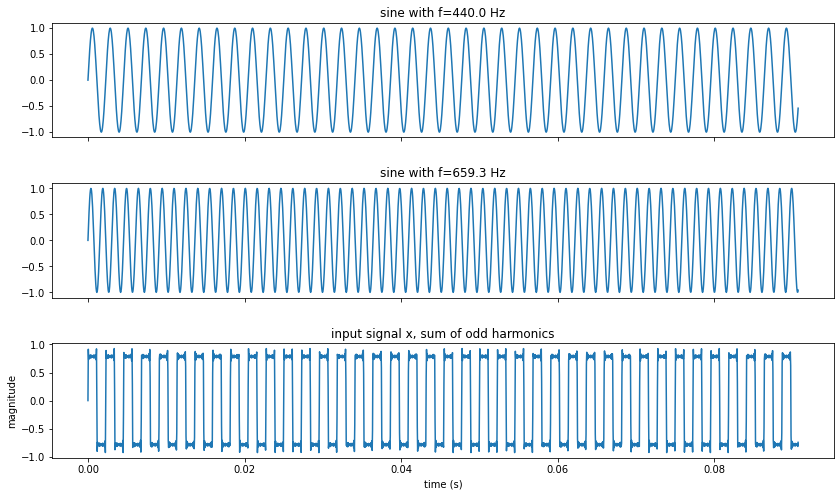

In [7]:
# indexing and input definition
pi = np.pi

T = 2000       # duration of input signal (T samples)
k = 8          # N to the kth power
N = 2**k       # desired length of zero padded input signal for an N-point FFT
# make sure N is sufficiently larger than T
while T*2 > N:
    k = k + 1
    N = 2**k

fs = 22050       # sampling freq
Ts = 1/fs        # delta t
ws = 2*np.pi*fs  # sampling freq (rad)

# zero pad
C = int((N-T)/2)        # index at t = 0
D = C + T               # index at t = T
n = np.linspace(0,T,T)
n_pad = np.linspace(0,N,N)

# frequency for input sines
# Hz
fa = pitch['A4']
fb = pitch['E5']
# rads
wa = 2*pi*fa
wb = 2*pi*fb

# define input signal

# sinusoid
sinx = np.zeros(N)
sin_wa = np.sin(wa*Ts*n)
sin_wb = np.sin(wb*Ts*n)
sinx[C:D] = sin_wa + sin_wb
sinx_title = 'sum of sinusoids'

# all harmonic sinusoid
num_harm = 11             # number of harmonics to include
sin_h = np.zeros(N)
sig = np.zeros(T)
for m in range(num_harm):
    harm = (1/(1+m))*np.sin(wa*(1+m)*Ts*n)
    sig = sig + harm
sin_h[C:D] = sig
sinh_title = 'sum of harmonics'

# odd harmonic sinusoid
sin_o = np.zeros(N)
sig = np.zeros(T)
for m in range(num_harm):
    odd = 2+(2*m-1)
    harm = (1/odd)*np.sin(wa*odd*Ts*n)
    sig = sig + harm
sin_o[C:D] = sig
sino_title = 'sum of odd harmonics'

# even harmonic sinusoid
sin_e = np.zeros(N)
sig = np.zeros(T)
for m in range(num_harm):
    even = 2*(m+1)
    harm = (2/even)*np.sin(wa*even*Ts*n)
    sig = sig + harm
sin_e[C:D] = sig
sine_title = 'sum of even harmonics'

# choose which input signal to analyze
#x = sin_h
#sig_title = sinh_title
x = sin_o
sig_title = sino_title
#x = sin_e
#sig_title = sine_title

# plot input signal
t = np.linspace(0,Ts*T,T)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,8), sharex=True)
plt.subplots_adjust(hspace=.4)      # leave space between subplots

ax1.plot(t,sin_wa)
ax1.set_title('sine with f=%.1f Hz' % fa)

ax2.plot(t,sin_wb)
ax2.set_title('sine with f=%.1f Hz' % fb)

ax3.plot(t,x[C:D])
ax3.set_title('input signal x, %s' % sig_title)
ax3.set_xlabel('time (s)')
ax3.set_ylabel('magnitude')

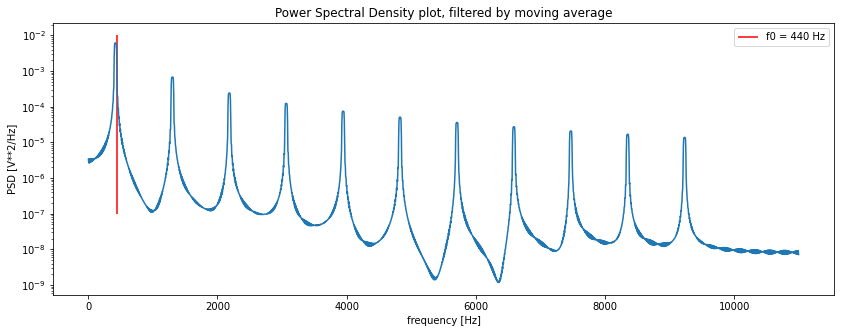

In [8]:
# Power spectral density

ff, PSD = signal.periodogram(x[2:N], fs)
fig= plt.figure(figsize=(14,5))

# mov avg fft
M = 7
cumsum, moving_aves = [0], []
for i, x in enumerate(PSD, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=M:
        moving_ave = (cumsum[i] - cumsum[i-M])/M
        moving_aves.append(moving_ave)
y = moving_aves

# find peaks
h_index = []
count = 0
for p in range(len(y)):
    if y[p] > 10**(-4):
        if count == 0:
            h_index.append(p)
            count = count +1
        elif count > 1:
            if p - 1 != h_index[p-1]:
                h_index.append(p)
        
plt.semilogy(ff[1:len(ff)-(M-1)], y[1:len(y)])
#plt.semilogy(ff[1:len(ff)], PSD[1:len(PSD)])
plt.title('Power Spectral Density plot, filtered by moving average')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.vlines(fa,10**-7,10**-2,colors='r',label='f0 = %d Hz' %(fa))
plt.legend()
plt.show()

Text(0, 0.5, 'magnitude')

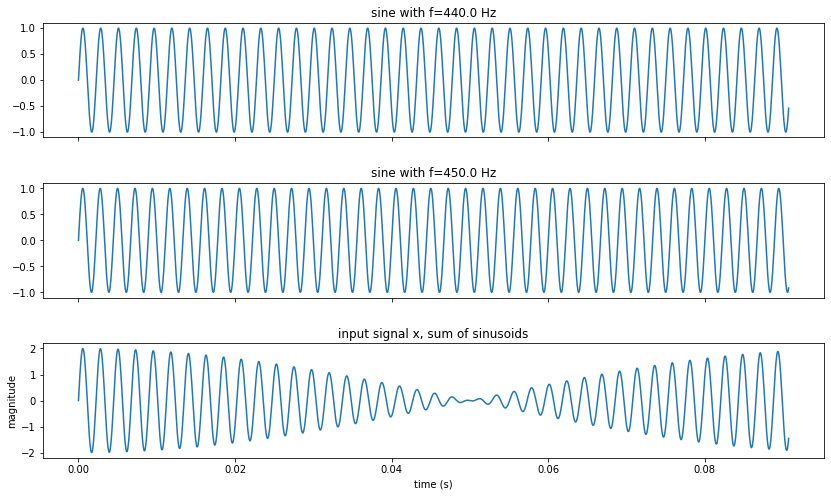

In [9]:
# close beat frequencies

# frequency for input sines
# Hz
fa = pitch['A4']
fb = fa + 10
# rads
wa = 2*pi*fa
wb = 2*pi*fb

# define input signal
# sinusoid
sinx = np.zeros(N)
sin_wa = np.sin(wa*Ts*n)
sin_wb = np.sin(wb*Ts*n)
sinx[C:D] = sin_wa + sin_wb
sinx_title = 'sum of sinusoids'

# choose which input signal to analyze
x = sinx
sig_title = sinx_title

# plot input signal
t = np.linspace(0,Ts*T,T)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,8), sharex=True)
plt.subplots_adjust(hspace=.4)      # leave space between subplots

ax1.plot(t,sin_wa)
ax1.set_title('sine with f=%.1f Hz' % fa)

ax2.plot(t,sin_wb)
ax2.set_title('sine with f=%.1f Hz' % fb)

ax3.plot(t,x[C:D])
ax3.set_title('input signal x, %s' % sig_title)
ax3.set_xlabel('time (s)')
ax3.set_ylabel('magnitude')

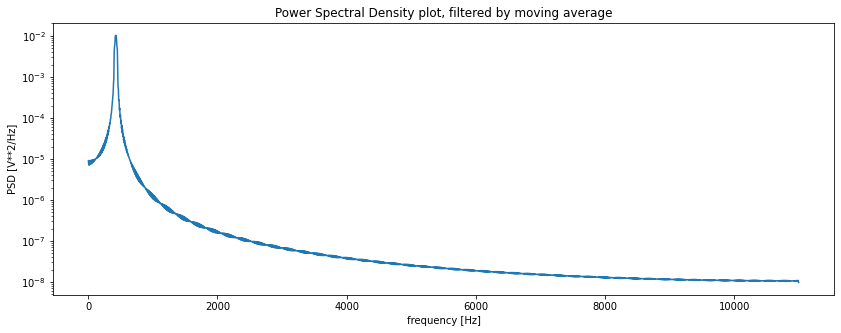

In [6]:
# Power spectral density

ff, PSD = signal.periodogram(x[2:N], fs)
fig= plt.figure(figsize=(14,5))

# mov avg fft
M = 7
cumsum, moving_aves = [0], []
for i, x in enumerate(PSD, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=M:
        moving_ave = (cumsum[i] - cumsum[i-M])/M
        moving_aves.append(moving_ave)

plt.semilogy(ff[1:len(ff)-(M-1)], moving_aves[1:len(moving_aves)])
#plt.semilogy(ff[1:len(ff)], PSD[1:len(PSD)])
plt.title('Power Spectral Density plot, filtered by moving average')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()